In [1]:
# Markov Chain Monte Carlo -- Metropolis-Hastings
import numpy as np
from scipy.stats import beta, norm, uniform, binom
import matplotlib.pyplot as plt
%matplotlib inline  
plt.style.use('ggplot')

# data
visits = 1058
hits = 52
loglikelihood =  lambda theta : binom(visits, theta).logpmf(hits)
logprior =  lambda theta: beta(2, 2).logpdf(theta)

# Algorithm parameters
niter = 10000
samples = np.zeros(niter + 1)
theta = 0.01
samples[0] = theta
naccepted = 0.0

for i in range(niter):
    # sample candidate from proposal distribution
    theta_candidate = theta + norm(0, 0.005).rvs()

    # compute acceptance rate
    alpha = loglikelihood(theta_candidate) + logprior(theta_candidate)
    alpha -=  loglikelihood(theta) + logprior(theta)
    
    # test if candidate will be accepted
    if uniform.rvs(0, 1) < np.exp(alpha):
        theta = theta_candidate
        naccepted += 1
    
    # store sample
    samples[i + 1] = theta
    
print('--- SUMMARY ---')
print('Acceptance ratio =', naccepted / niter)
print('Mean sample = ', samples.mean())
print('STD sample = ', samples.std())

--- SUMMARY ---
Acceptance ratio = 0.7765
Mean sample =  0.0510095163361
STD sample =  0.00689751025709


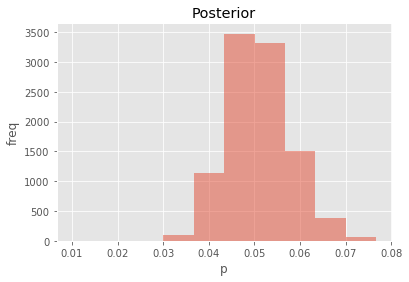

In [2]:
plt.hist(samples, alpha=0.5)
plt.xlabel('p')
plt.ylabel('freq')
plt.title('Posterior')

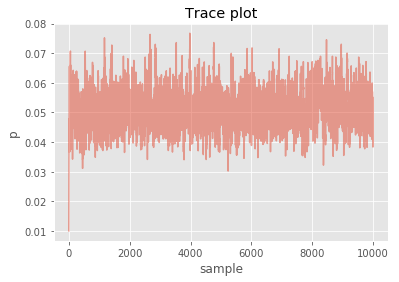

In [3]:
plt.plot(samples, alpha=0.5)
plt.xlabel('sample')
plt.ylabel('p')
plt.title('Trace plot')